# Decomposing signals into meaningful components

In the previous class we discussed how to transform original data into a different "space" so that the structure or important aspects of the data would be retained. We also saw and example of using statistcs (histogram) as a feature. 

One important question that we did not consider is how to compare different data, or in other words what is the distance function according to which we can decide if features are similar or different. We will not get into this question here and assume that Euclidian distance (or RMS = root mean square) is the correct measure to use.

Let us now move on to the third method of feature extraction, which is data reduction or factorization technique that tries not only to find the best representation, but also keeps only the most salient "dimensions" or attributes of the data. A different important technique is clustering, and it will be discussed later on.

Let us take a look at the Iris Data set http://en.wikipedia.org/wiki/Iris_flower_data_set  
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray  
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

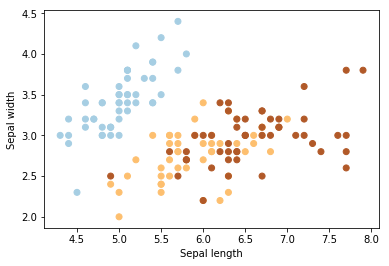

In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='Paired')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

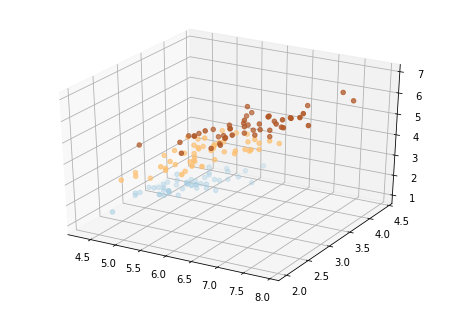

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='Paired')

It is hard to find the strucure in this plot.  
Which dimensions (attributes or features) to use?  
May be the data should be rotated or stretched to show better the difference between species?  

Principal Component Analysis (PCA) is an unsupervised technique.  
It identifies the directions in the feature space that account for the most variance in the data. 

Linear Discriminant Analysis (LDA) is a supervised technique. 
It uses the labels to identify comination of attributes (directions in feature space) that account for the most variance between classes, while minimizing the variance within the classes.

explained variance ratio (first two components): [ 0.92461621  0.05301557]


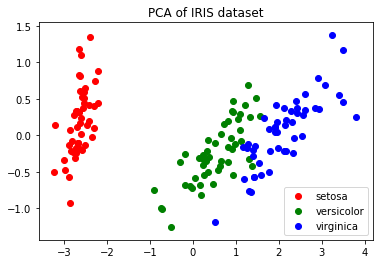

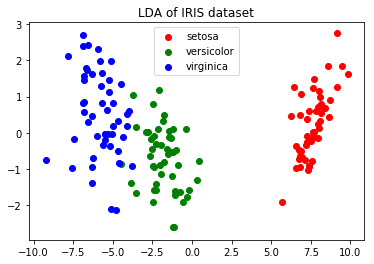

In [5]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, Y).transform(X)

target_names = iris.target_names

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[Y == i, 0], X_r2[Y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')


Since most of the data we will be dealing with is unlabeled (music, films, sensors), we will focus mostly on unsupervised data analysis techniques. One of the main techniques to decompose data into factors, also used in implementation of PCA, is so called Singular Value Decomposition, or SVD.

## Finding Image Features with SVD

Let us now use an image dataset example to introduce the SVD method. 


[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


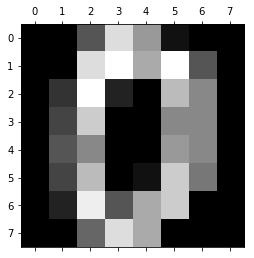

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
Ximages = digits.images

print X[0]
print Ximages[0]
plt.matshow(Ximages[0], cmap='gray')

The dataset set contains images of digits with labels, saved as data and as an image.

We apply SVD to the data representation.

In [12]:
np.linalg.svd?

dimensions of X are (1797, 64)
dimensions of U are (1797, 1797)
dimensions of D are (64,)
dimensions of V are (64, 64)


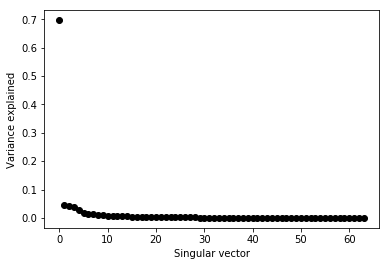

In [13]:
U, D, V = np.linalg.svd(X)

print 'dimensions of X are %s' % str(X.shape)
print 'dimensions of U are %s' % str(U.shape)
print 'dimensions of D are %s' % str(D.shape)
print 'dimensions of V are %s' % str(V.shape)

plt.plot(D**2 / np.sum(D**2), 'ok')
plt.xlabel('Singular vector')
plt.ylabel('Variance explained');


SVD decomposes the data matrix X into 3 matrices $$\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V^T}$$

**D** is a diagonal matrix. Each element **D[i,i]** is fraction of the overall standard deviation in the data due to contribution of the element in column i of matrix **U**.

**U** becomes the new coordinate system (basis), and the coordiantes of each data sample in **X** are given by rows of **V**.

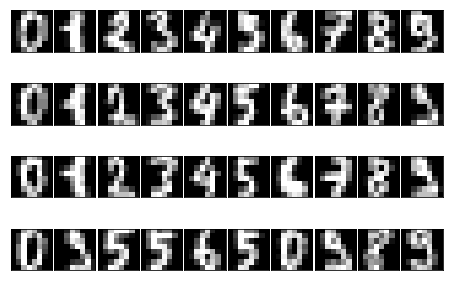

In [14]:
fig = plt.figure(figsize=(6, 4))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i,:].reshape(8,8), cmap='gray')

The original numbers have quite a lot of variation.  
Let us compare that to the "Eigen-numbers".  

Remark: It can be shown that the new basis (columns of **U**) are eigenvectors of the correlation matrix of **X**. This is where the name "Eigen-numbers" comes from.

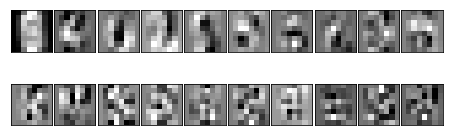

In [15]:
#Eigen numbers
        
fig = plt.figure(figsize=(6, 2))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(V[i,:].reshape(8,8), cmap='gray')
    


Here are some approximations (decompositions) of the first ten digits using 10, 5 and 1 Eigen-numbers, respectively.

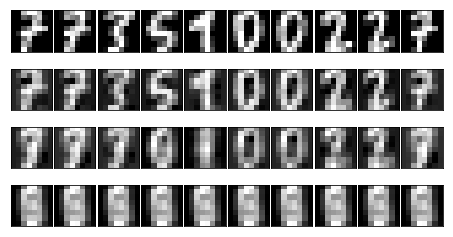

In [16]:
approx1 = np.dot(U[1200:1210,:1], np.dot(np.diag(D)[:1,:1], V[:1,:]))
approx5 = np.dot(U[1200:1210,:5], np.dot(np.diag(D)[:5,:5], V[:5,:]))
approx10 = np.dot(U[1200:1210,:20], np.dot(np.diag(D)[:20,:20], V[:20,:]))

fig = plt.figure(figsize=(6, 4))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#?? plot should be a loop on the first 10 digits.
for i in range(10):

    ax  = fig.add_subplot(5,10, i+1, xticks=[], yticks=[])
    ax.imshow(X[1200+i,:].reshape(8,8),cmap='gray')
#   title('Original digits')
    
    ax  = fig.add_subplot(5,10, i+11, xticks=[], yticks=[])
    ax.imshow(approx10[i,:].reshape(8,8),cmap='gray')
#   title('Approx. with 10 features')
    
    ax  = fig.add_subplot(5,10, i+21, xticks=[], yticks=[])
    ax.imshow(approx5[i,:].reshape(8,8),cmap='gray')
#   title('Approx. with 5 features')
    
    ax  = fig.add_subplot(5,10, i+31, xticks=[], yticks=[])
    ax.imshow(approx1[i,:].reshape(8,8),cmap='gray')
#    title('Approx. with 1 feature')


### Discussion:
Those familiar with neuro-biology of the visual system may find the Eigen-numbers reminiscent of complex-cells. These are advanced detectors of visual features that capture parts of objects rather then simple blobs or edges. 

In biology, complex cells are usually considered to be the next layer above simple detectors. Similarly, machine learning methods such as PCA or other factorization techniques are often applied to lower level features, such as MFCC in audio.

## Learning Audio Components using SVD

This technique is also closely related to sub-space projection methods for denoising.  
Let us create a synthetic sound example comprising of a sinusoid with noise.

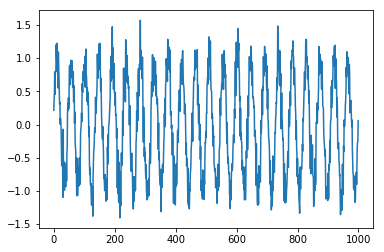

In [24]:
fs = 10000
f0 = 220 #220 #200
#Show about difference if f0=200 versus 220. 
# Add another component s2 and show why SVD finds a combination signal. 
# This can be considered as a complex "sound object" versus DFT basis.
T = 3
Ns = fs*T
s = np.sin(2*np.pi*f0*np.arange(Ns)/fs)
s2 = np.sin(2*np.pi*3.5*f0*np.arange(Ns)/fs)
n = np.random.randn(Ns)
#x = s + s2 + 0.3*n
x = s + 0.2*n

plt.plot(x[:1000])

from scipy.io import wavfile
wavfile.write('out1.wav', fs, x)

As we have already seen, the first step in audio processing is cutting it into separate frames, also known as "audio vectors".

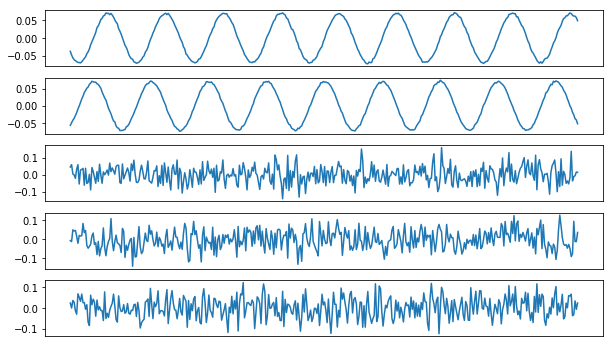

In [25]:
def buffer(input_data, sample_rate, window_size, hop_size):
    output = np.array([input_data[i:i+window_size] for i in range(0, len(input_data)-window_size, hop_size)])
    return output.T


xmat = buffer(x,fs,400,200)
U, D, V = np.linalg.svd(xmat)

plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(U[:,i])
    plt.xticks([])

The contribution of each of the different factors are as follows

<Container object of 3 artists>

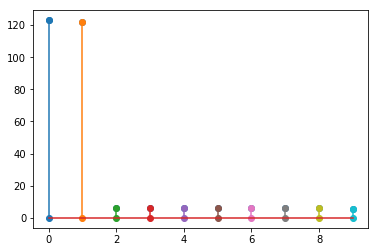

In [26]:
plt.stem(D[:10],'-o')

And here are the coefficients of each component (first 5) 

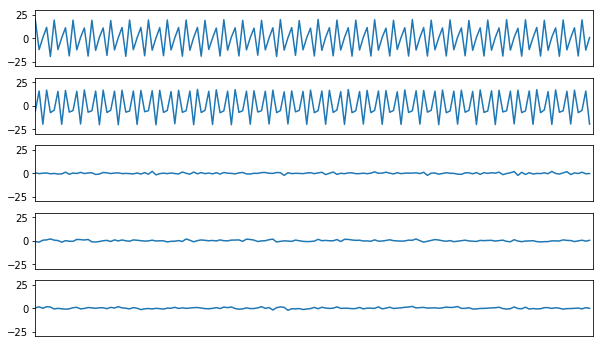

In [34]:
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(V[i,:]*D[i])
    plt.axis([0,V.shape[0],-30,30])
    plt.xticks([])


We can also reconstruct the orignal signal using few components

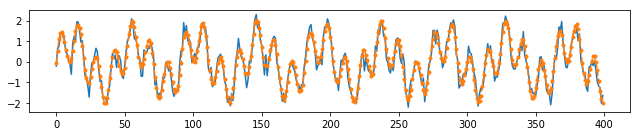

In [37]:
plt.figure(figsize=(9,2))
plt.plot(xmat[:,0])
plt.plot(U[:,0]*D[0]*V[0,0] + U[:,1]*D[1]*V[1,0],'--.')
plt.tight_layout()

As you can see, the coefficients of the components change over time, but the first two behave in very periodic manner, while the others are more random.  

How can we measure this predictability? Is it improtant for distinction between structure and noise (especially in time-based signals)?

##Estimating Structure in Time

The number of features is related to signal complexity. Their predictability is another important feature.

One powerful method is "spectral flatness". Lets do a simple version here

Here we plot rho which is a measure of predictability derived from SFM as 
$$ \rho = e^{-2*\small{SFM}}$$

See: http://en.wikipedia.org/wiki/Spectral_flatness
This measure is closely related to Information Rate, which is a topic of our last lecture


<Container object of 3 artists>

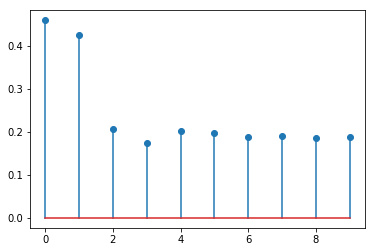

In [38]:
from scipy.stats.mstats import gmean

rho = np.zeros(10)
for i in range(10):
    Vft = np.abs(np.fft.rfft(V[i,:]))
    sf = gmean(Vft)/np.mean(Vft)
    rho[i] = np.exp(-2*sf)
    
plt.figure()
plt.stem(rho)


###Discussion:

Why this is interesting / useful? Many issues related to perception of structure are based on a balance between complexity and predicability. 

Even our human perception of aesthetics seems to take these relations into account. Complex signals require an effort in terms of the resources needed to decode or represent them efficiently.

Predictability is related to our ability to form expectations and project the future. 
For a full discussion, please see my "Spectral Anticipations" paper in CMJ.


## Audio Basis and Karhunen-Loeve Transform

The decomoposition of our data matrix **X** into three matrices **X** = **UDV** can be also seen as a combination of two matrices: **U** that provides coordinates for a new space where data elements are combined differently and in more efficient way that allows also a lower-dimensional representation, and a set of coefficients **C** = **DV** that give the relative weights of each basis element over time.

Karhunen-Loeve Transform is closely related to PCA and SVD since it also uses eigen-decomposition to represent measurements in a lower dimensional space. Its main distinction is that it operates on random data vectors (patterns with probability function) and performs eigen-vector analysis on the correlation matrix **R**.

Relating this back to SVD is done by noticing that for **X** = **UDV**, the correlation matrix is approximated (up to division by number of frames) by **XX' = UD<sup>2</sup>U'** which has **U** as eigenvector **XX'U = UD<sup>2</sup>**

### Audio Basis
It is common in audio analysis to perform feature extraction not from signal data (samples) directly, but from FFT magnitude. In such case **X** would be a matrix containing the absolute values of Fourier Transform of short audio frames, also known as spectrogram. Thus our measurements or initial patterns are amplitudes of different frequency components, and each frame is considered as a separate experimental outcome. The correlation matrix **R** = E[**XX'**] is approximated by averaging over many such vectos.

Accordngly, **U** are sometimes called Audio Basis Vectors, and their linear combination is given by multiplying them by **V** with their relative "strengths" **D**. The elements of matrix **C** = **DV** are called "time coefficients" or "expension coefficients" for the audio basis **U**.

We perform Short Time Fourier Analysis (stft), and use normalized log-spectrum as our features. 

Then we apply SVD to this data matrix. We will reduce the number of elements (basis vectors) which will extract features by retaining fewer vectors with highest eignevalues (elements that contribute most to the variance).

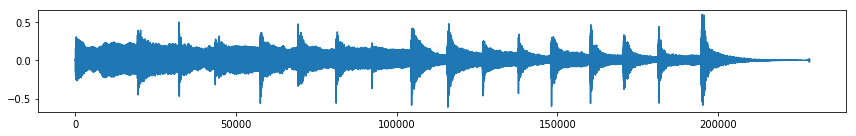

In [41]:
import librosa
x, fs = librosa.load('./audio_files/ohm_scale.wav')

plt.figure(figsize=(12,2))
plt.plot(x)
plt.tight_layout()

(512, 893) (512,)


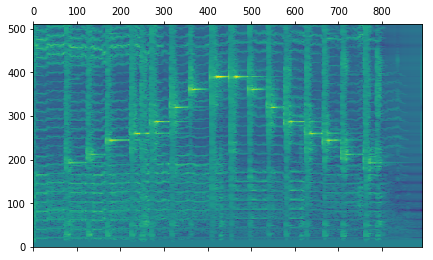

In [49]:
import scipy

# def stft(input_data, sample_rate, window_size, hop_size):
#     window = scipy.hamming(window_size)
#     output = scipy.array([scipy.fft(window*input_data[i:i+window_size]) 
#                          for i in range(0, len(input_data)-window_size, hop_size)])
#     return output

X = librosa.amplitude_to_db(np.abs(librosa.stft(x, n_fft=4096, hop_length=256)))
X = X[:512,:]
Xmean = np.mean(X, axis = 1)
print np.shape(X), np.shape(Xmean)
X = X - np.matrix(Xmean).T*np.matrix(np.ones(np.shape(X)[1]))
X = np.array(X)
D = np.diag(1/np.sqrt(np.sum(X**2,0))) #
Xnorm = np.dot(X,D)


plt.figure(figsize=(9,2))
plt.matshow(Xnorm, origin='lower')

### Computing Correlations

Now when we have our data processed to our satisfaction, we can start computing correlations betwen the rows or the colums of the data matrix.

Let us call **S** the product of rows, or along the time dimension, and **R** the product along columns, or the frequency dimension.

(512, 512)


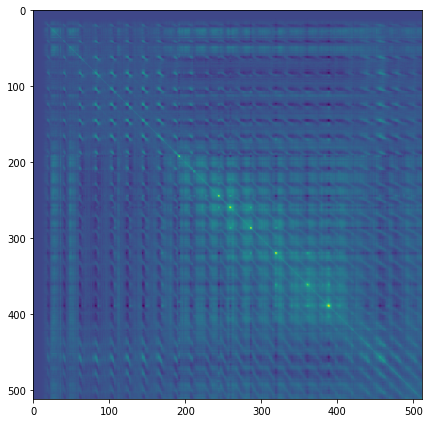

In [56]:
R = np.dot(Xnorm,Xnorm.T)
print R.shape
plt.figure(figsize=(6, 6))
plt.imshow(R, origin='upper')
plt.tight_layout()

(893, 893)


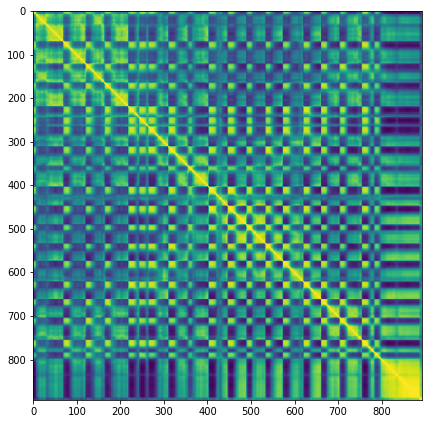

In [59]:
S = np.dot(Xnorm.T,Xnorm)
print S.shape
plt.figure(figsize=(6, 6))
plt.imshow(S,origin='upper')
plt.tight_layout()

Both of these correlation matrices are important for extracting the essential information from our data. Matrix S captures similirities between the spectra across different time. This is easy to understand by visualizing it. Matrix R captures correlations across frequencies, and is harded visualize as such, although we will use its most important dimensions or principal vectors, to reduce the dimension of the data.
Let's first visualize matrix S, which is also known in computer music as "Self Similarity" matrix http://en.wikipedia.org/wiki/Self-similarity_matrix

In [60]:
U, D, V = np.linalg.svd(Xnorm)

U = np.matrix(U)
V = np.matrix(V)
Xnorm = np.matrix(Xnorm)

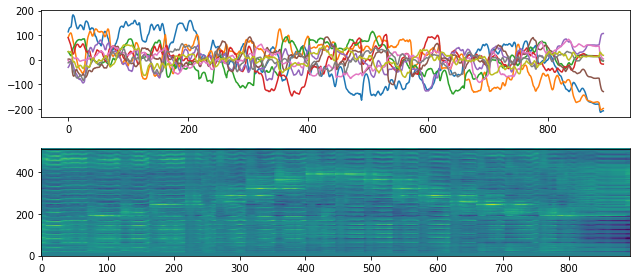

In [65]:
s = 1
dim = 10

#Xdim = U[:,:dim]*diag(D[:dim])*V[:dim,:]
KLT = U[:,s:dim].T * X
Xdim = U[:,s:dim] * KLT

plt.figure(figsize=(9,4))
plt.subplot(211)
for i in np.arange(0,dim-s):
    plt.plot(np.array(KLT[i,:]).T, label=str(i))
#legend()

plt.subplot(212)
plt.imshow(Xdim,origin='lower', aspect = "auto")
plt.tight_layout()
#figure(figsize=(25,25))
#subplot(313)
#imshow(KLT.T*KLT)


##Discussion:
We are lead to expect that KLT would extract the individual notes or components of this recording. Does it do it? Unfortunately not. Some of the reasons are that KLT does not take into account the spectrogram is a positive matrix. There are other methods, such as NMF that are specially designed to do that. Also it is not taking into account the non-linear or non-Gaussian nature of the signals. Methods such as ICA are designed for componenet instruction by taking this information into account. Indeed, Audio Basis is defined as an ICA transform, but in practice many times PCA / KLT are used.